In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from probml_utils import latexify, savefig, is_latexify_enabled
from scipy.stats import t, norm, laplace

In [2]:
latexify(fig_width=0.45 * 6, fig_height=1.5)

D:\ML_DL\probml-utils\probml_utils\plotting.py:25: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
x = np.linspace(-4, 4, 100)
normal = norm.pdf(x, loc=0, scale=1)
laplace_ = laplace.pdf(x, loc=0, scale=1 / (2**0.5))
student_t1 = t.pdf(x, df=1, loc=0, scale=1)
student_t2 = t.pdf(x, df=2, loc=0, scale=1)

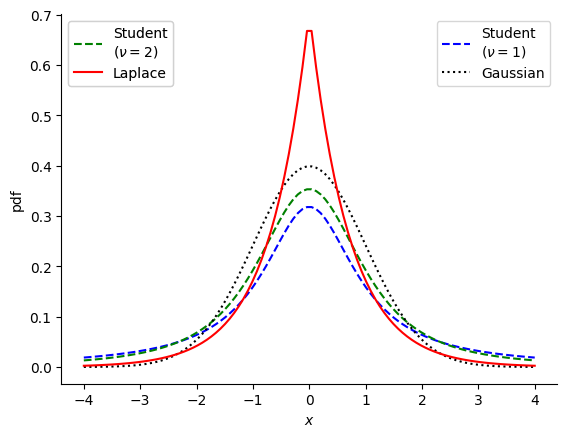

In [5]:
LEGEND_SIZE = 7 if is_latexify_enabled() else None

plt.figure()

ax = plt.gca()
(t1_plot,) = plt.plot(x, student_t1, "b--", label="Student\n" + r"$(\nu=1)$")
(t2_plot,) = plt.plot(x, student_t2, "g--", label="Student\n" + r"$(\nu=2)$")
(norm_plot,) = plt.plot(x, normal, "k:", label="Gaussian")
(laplace_plot,) = plt.plot(x, laplace_, "r-", label="Laplace")

legend1 = plt.legend(handles=[t1_plot, norm_plot], loc="upper right", prop={"size": LEGEND_SIZE})
ax.add_artist(legend1)
legend2 = plt.legend(handles=[t2_plot, laplace_plot], loc="upper left", prop={"size": LEGEND_SIZE})
ax.add_artist(legend2)

plt.ylabel("pdf")
plt.xlabel("$x$")
sns.despine()
# savefig("./studentLaplacePdf2.pdf")

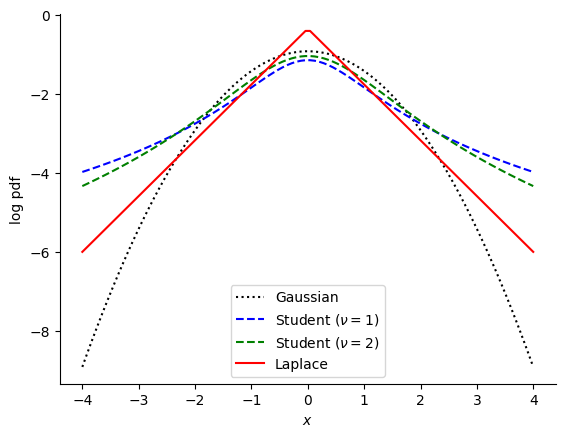

In [6]:
plt.figure()
plt.plot(
    x, np.log(normal), "k:", x, np.log(student_t1), "b--", x, np.log(student_t2), "g--", x, np.log(laplace_), "r-"
)


plt.ylabel("log pdf")
plt.xlabel("$x$")
plt.legend(("Gaussian", "Student " + r"$(\nu=1)$", "Student " + r"$(\nu=2)$", "Laplace"), prop={"size": LEGEND_SIZE})
sns.despine()
# savefig("./studentLaplaceLogpdf2.pdf")

In [7]:
def make_graph(data):
    plt.figure(figsize=(8, 6))
    x = np.linspace(-4, 4, 100)
    deg_of_freedom = data["dof"]
    loc = data["loc"]
    scale = data["scale"]

    student_t = t.pdf(x, df=deg_of_freedom, loc=loc, scale=scale)
    normal = norm.pdf(x, loc=loc, scale=scale)
    laplace_ = laplace.pdf(x, loc=loc, scale=scale)

    plt.plot(x, normal, "k:", x, student_t, "g--", x, laplace_, "r-")
    plt.ylim(0, 0.6)
    plt.legend(("Gaussian", "Student", "Laplace"), bbox_to_anchor=(1.1, 1))
    sns.despine()

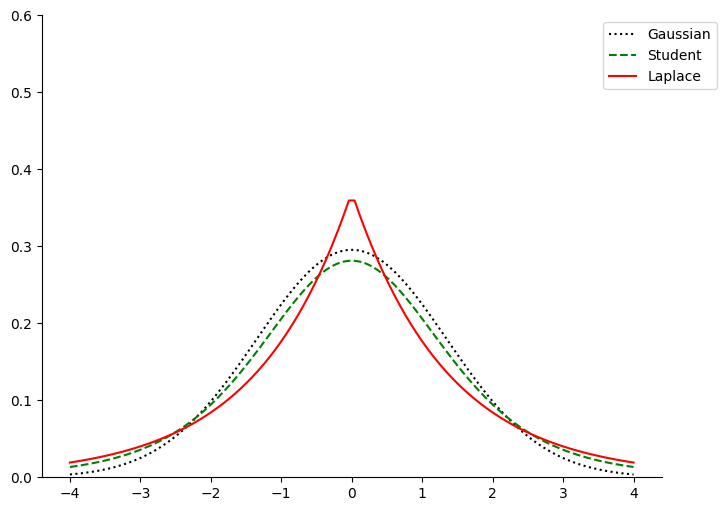

interactive(children=(FloatSlider(value=5.05, description='dof', max=10.0, min=0.1), FloatSlider(value=0.0, de…

In [8]:

from ipywidgets import interact


@interact(dof=(0.1, 10), loc=(-1.1, 1.1), scale=(0.7, 2))
def generate_random(dof, loc, scale):
    data = {}
    data["dof"] = dof
    data["loc"] = loc
    data["scale"] = scale

    make_graph(data)